# Comparison of Tensorflow and PyTorch

In [545]:
import tensorflow as tf
import torch
import numpy as np

In [546]:
print(torch.__version__)

0.4.0


In [547]:
print(tf.__version__)

1.5.1


### 1. Tensor initialization

#### PyTorch

In [548]:
t = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])
t

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]])

In [549]:
t.shape

torch.Size([2, 3])

In [550]:
t.dtype

torch.float32

In [551]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [552]:
torch.zeros(3, 3)

tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])

In [553]:
torch.randn(3, 3)

tensor([[-1.4157, -0.6496, -0.2481],
        [ 1.4585,  0.0074,  0.5909],
        [ 0.3177, -0.4014,  1.5515]])

In [554]:
np.random.seed(1)
a = np.random.choice(6, size=9).reshape(3, 3)
torch.from_numpy(a)

tensor([[ 5,  3,  4],
        [ 0,  1,  3],
        [ 5,  0,  0]])

#### Tensorflow

In [555]:
t = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.float32)
t

<tf.Tensor 'Const_50:0' shape=(2, 3) dtype=float32>

In [556]:
t.dtype

tf.float32

In [557]:
t.shape

TensorShape([Dimension(2), Dimension(3)])

***Note: In Tensorflow, nothing is evaluated until a session is started***

In [558]:
sess = tf.InteractiveSession()
t.eval(session=sess)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [559]:
tf.zeros([3, 3]).eval(session=sess)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [560]:
tf.random_normal([3, 3]).eval(session=sess)

array([[ 0.1868555 ,  1.2591057 ,  1.0832303 ],
       [ 1.7571317 ,  0.39849484,  0.5355798 ],
       [ 1.4263446 ,  1.4652324 , -0.282873  ]], dtype=float32)

In [561]:
np.random.seed(1)
a = np.random.choice(6, size=9).reshape(3, 3)
tf.constant(a).eval(session=sess)

array([[5, 3, 4],
       [0, 1, 3],
       [5, 0, 0]])

### 2. Slicing

#### PyTorch

In [562]:
t = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])
t

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]])

In [563]:
t[:, -1]

tensor([ 3.,  6.])

#### Tensorflow

In [564]:
t = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.float32)
t

<tf.Tensor 'Const_52:0' shape=(2, 3) dtype=float32>

In [565]:
t[:, -1].eval(session=sess)

array([3., 6.], dtype=float32)

### 3. Matrix Operations

In [566]:
a = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.float64)
b = np.random.randn(2, 3)

#### PyTorch

In [567]:
x = torch.from_numpy(a)
x

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]], dtype=torch.float64)

In [568]:
y = torch.from_numpy(b)
y

tensor([[-1.6017, -1.4778,  0.4835],
        [ 0.1884, -0.4647,  0.8618]], dtype=torch.float64)

In [569]:
xT = x.t()
xT

tensor([[ 1.,  4.],
        [ 2.,  5.],
        [ 3.,  6.]], dtype=torch.float64)

In [570]:
x.permute(1, 0)

tensor([[ 1.,  4.],
        [ 2.,  5.],
        [ 3.,  6.]], dtype=torch.float64)

In [571]:
x.view(1, 6)

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.]], dtype=torch.float64)

In [572]:
x + y

tensor([[-0.6017,  0.5222,  3.4835],
        [ 4.1884,  4.5353,  6.8618]], dtype=torch.float64)

In [573]:
x.mul(y)

tensor([[-1.6017, -2.9557,  1.4505],
        [ 0.7537, -2.3234,  5.1710]], dtype=torch.float64)

In [574]:
x.cross(y)

tensor([[ 5.4005, -5.2887,  1.7256],
        [ 7.0973, -2.3167, -2.8009]], dtype=torch.float64)

In [575]:
y.mm(xT)

tensor([[ -3.1069, -10.8951],
        [  1.8445,   3.6013]], dtype=torch.float64)

#### Tensorflow

In [576]:
x = tf.constant(a)
x.eval(session=sess)

array([[1., 2., 3.],
       [4., 5., 6.]])

In [577]:
y = tf.constant(b)
y.eval(session=sess)

array([[-1.601721  , -1.47782957,  0.48349585],
       [ 0.18843661, -0.46468632,  0.86182712]])

In [578]:
tf.transpose(x).eval(session=sess)

array([[1., 4.],
       [2., 5.],
       [3., 6.]])

In [579]:
xT = tf.transpose(x, perm=[1, 0])
xT.eval(session=sess)

array([[1., 4.],
       [2., 5.],
       [3., 6.]])

In [580]:
tf.reshape(x, [1, 6]).eval(session=sess)

array([[1., 2., 3., 4., 5., 6.]])

In [581]:
x.shape, y.shape

(TensorShape([Dimension(2), Dimension(3)]),
 TensorShape([Dimension(2), Dimension(3)]))

In [582]:
(x + y).eval(session=sess)

array([[-0.601721  ,  0.52217043,  3.48349585],
       [ 4.18843661,  4.53531368,  6.86182712]])

In [583]:
tf.multiply(x, y).eval(session=sess)

array([[-1.601721  , -2.95565914,  1.45048754],
       [ 0.75374642, -2.32343162,  5.1709627 ]])

In [584]:
tf.cross(x, y).eval(session=sess)

array([[ 5.40048041, -5.28865886,  1.72561244],
       [ 7.09725353, -2.31668884, -2.80092832]])

In [585]:
tf.matmul(y, xT).eval(session=sess)

array([[ -3.1068926 , -10.89505678],
       [  1.84454531,   3.60127751]])

### 4. Creating and Evaluating Computation Graphs

#### PyTorch

In [586]:
# Create and evaluate computation graph.
a = torch.Tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = torch.Tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = a.mm(b)
c

tensor([[ 22.,  28.],
        [ 49.,  64.]])

#### Tensorflow

In [587]:
# 1. Create a computation graph.
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], name='a')
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], name='b')
c = tf.matmul(a, b)

In [588]:
# 2. Create a session
sess = tf.Session()

In [589]:
# 3. Evaluate the graph
print(sess.run(c))

[[22. 28.]
 [49. 64.]]


### 5. Computing Gradients (Automatic Differentiation)

Suppose we have the following:
    
$$A = \frac{1}{n}\sum_i\sum_jz_{ij}^2$$

where

$$Z = W.X$$

(A, W, X, and Z are matrices)
and we want to evaluate the derivatives with respect to each $w_{ij}$:

$$\frac{dA}{dw_{ij}}$$

### PyTorch

In [590]:
# Create and evaluate computation graph.
w = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], requires_grad=True)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
z = w.mm(x)
a = (z**2).sum()/4
a

tensor(1941.2500)

In [591]:
w.requires_grad, x.requires_grad

(True, False)

In [592]:
z.grad_fn, a.grad_fn

(<MmBackward at 0x1c34572be0>, <DivBackward0 at 0x1c345726d8>)

In [593]:
# Back-propagation
a.backward()

In [594]:
# Display gradients (dA/dW)
w.grad

tensor([[  39.0000,   89.0000,  139.0000],
        [  88.5000,  201.5000,  314.5000]])

### Tensorflow

In [595]:
# 1. Create a computation graph.
w = tf.placeholder(dtype=tf.float64, shape=(2,3), name='w')
x = tf.placeholder(dtype=tf.float64, shape=(3,2), name='x')
z = tf.matmul(w, x)
a = tf.reduce_sum(z**2)/4

In [596]:
# 2. Create a session
sess = tf.Session()

In [597]:
# 3. Evaluate the graph
w_init = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
data = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

print(sess.run(a, feed_dict={w: w_init, x: data}))

1941.25


In [598]:
# 4. Evaluate gradients (dA/dW)
grad = tf.gradients(a, w)
print(sess.run(grad, feed_dict={w: w_init, x: data}))

[array([[ 39. ,  89. , 139. ],
       [ 88.5, 201.5, 314.5]])]


### Use of GPUs

#### PyTorch

In [599]:
if torch.cuda.is_available():
    gpu_list = {i: torch.cuda.get_device_name(i) for i in 
                range(torch.cuda.device_count())}
    print("Using GPUs:\n", gpu_list)
else:
    print("Using CPU")

Using CPU


In [600]:
a = torch.Tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = torch.Tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

if torch.cuda.is_available():
    device = torch.device("cuda")
    a = a.to(device)
    b = b.to(device)

c = a.mm(b)
c = c.to("cpu")

In [601]:
a.device, b.device, c.device

(device(type='cpu'), device(type='cpu'), device(type='cpu'))

#### Tensorflow

For any TensorFlow operation that has both CPU and GPU implementations, GPU devices will be given priority.  For example, on a system with device names `'cpu:0'` and `'gpu:0'`, `'gpu:0'` will be selected to run `matmul`.

To check that the correct devices visible to TF use this

In [602]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3173594071455480053
]


To run an operation on a device of your choice instead of what's automatically selected for you, you can use `with tf.device` to create a device context such that all the operations within that context will have the same device assignment.  If you create the session with `log_device_placement` configuration option set to `True` you will see output in the console (not in the Jupyter notebook) showing what devices your operations and tensors are assigned to.

In [603]:
# Creates a graph.
with tf.device('/cpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

[[22. 28.]
 [49. 64.]]


Typical output in console:

``` Text
2018-05-16 11:41:31.392516: I tensorflow/core/common_runtime/direct_session.cc:297] Device mapping:

MatMul_29: (MatMul): /job:localhost/replica:0/task:0/device:CPU:0
2018-05-16 11:41:31.409681: I tensorflow/core/common_runtime/placer.cc:874] MatMul_29: (MatMul)/job:localhost/replica:0/task:0/device:CPU:0
MatMul_28: (MatMul): /job:localhost/replica:0/task:0/device:CPU:0
2018-05-16 11:41:31.409698: I tensorflow/core/common_runtime/placer.cc:874] MatMul_28: (MatMul)/job:localhost/replica:0/task:0/device:CPU:0
MatMul_27: (MatMul): /job:localhost/replica:0/task:0/device:CPU:0
```
...etc.


## Example Application: Neural net for classifying handwritten digits (MNIST dataset)

In [604]:
import matplotlib.pyplot as plt

%matplotlib inline

### Pytorch

In [ ]:
input("Press enter to continue")

### Tensorflow

The code here is based on the example in the Tensorflow documentation https://www.tensorflow.org/versions/r1.0/get_started/mnist/beginners

In [605]:
# Load MNIST training data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The MNIST data is split into three parts:
1. 55,000 data points of training data (mnist.train)
2. 10,000 points of test data (mnist.test)
3. 5,000 points of validation data (mnist.validation).

In [655]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [656]:
type(mnist.train.images)

numpy.ndarray

`mnist.train.images` is a tensor (an n-dimensional array) with a shape of [55000, 784]. The first dimension is an index into the list of images and the second dimension is the index for each pixel in each image.

In [657]:
mnist.train.images[0].shape

(784,)

A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the $i$th digit will be represented as a vector which is 1 in the $i$th dimension. 

For example, 3 would be `[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]`. 

Therefore, `mnist.train.labels` is a `[55000, 10]` array of floats.

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


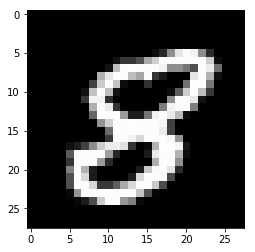

In [675]:
# Display an example of one image
i = 0
print(mnist.train.labels[i])
ax = plt.imshow(mnist.train.images[i].reshape((28, 28)), cmap='gray')

In [676]:
# Tensor for input vector
x = tf.placeholder(tf.float32, [None, 784])

In [677]:
# Tensor for weights and biases
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [678]:
# Network outputs (predictions)
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [679]:
# Placeholder for correct labels
y_ = tf.placeholder(tf.float32, [None, 10])

In [680]:
# Loss function ("cross-entropy")
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# The following is more numerically stable than above:
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))

In [681]:
# Define training method
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [682]:
# Start a session
sess = tf.InteractiveSession()

# Initialize variables
tf.global_variables_initializer().run()

In [683]:
# Training
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [684]:
# Define a scoring mechanism
prediction = tf.argmax(y, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [685]:
# Calculate accuracy on test set
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9167


i: 7955
Prediction: 2
Truth: 2


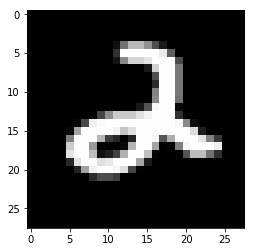

In [720]:
# Make predictions on test set
i = np.random.randint(len(mnist.test.images))
y_hat = prediction.eval(
    session=sess, 
    feed_dict={x: mnist.test.images[i].reshape(1, -1)}
).tolist()[0]
print("i:", i)
print("Prediction:", y_hat)
print("Truth:", y_test[i:i+1].argmax())
ax = plt.imshow(mnist.test.images[i].reshape((28, 28)), cmap='gray')

In [691]:
# Error analysis
errors = np.invert(
    correct_prediction.eval(session=sess, 
                             feed_dict={x: mnist.test.images, y_: mnist.test.labels})
)
errors.sum()

833

In [718]:
# List of incorrect predictions
error_indices = np.where(errors)[0]
error_indices[0:10]

array([  8,  33,  63,  77,  92, 124, 149, 193, 195, 217])

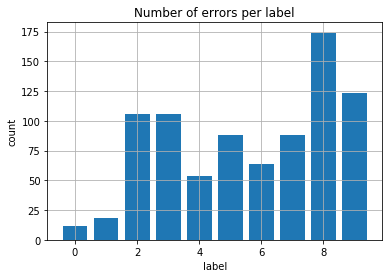

In [742]:
plt.bar(range(10), np.bincount(np.argmax(y_test[errors], 1)))
plt.title("Number of errors per label")
plt.xlabel('label')
plt.ylabel('count')
plt.grid()

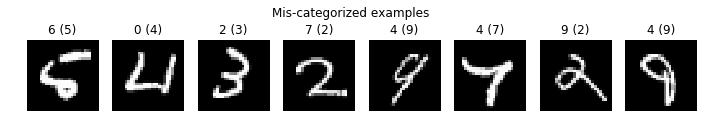

In [745]:
fig, axes = plt.subplots(1, 8, figsize=(12,2))

for i, ax in zip(error_indices[0:8], axes):
    ax.imshow(mnist.test.images[i].reshape((28, 28)), cmap='gray')
    y_hat = prediction.eval(
        session=sess, 
        feed_dict={x: mnist.test.images[i].reshape(1, -1)}
    ).tolist()[0]
    text = "{} ({})".format(y_hat, y_test[i:i+1].argmax())
    ax.set_title(text)
    ax.axis('off') 

fig.suptitle("Mis-categorized examples")
plt.show()

In [653]:
input("Press enter to continue")

Press enter to continue


''

### Keras

Based on example from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [748]:
# import the necessary packages
import keras
from keras.datasets import mnist
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [749]:
type(mnist)

module

In [750]:
# input data dimensions
img_rows, img_cols = 28, 28
num_classes = 10

In [751]:
# Training parameters
batch_size = 128
epochs = 3

In [752]:
# Load the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [753]:
# Reshape data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [754]:
# Preprocess data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [755]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [756]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [757]:
# Build model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [758]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [759]:
#Training - THIS CAN TAKE SOME TIME!
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2638 - acc: 0.9185 - val_loss: 0.0560 - val_acc: 0.9821

In [760]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0335428562268964
Test accuracy: 0.9883


In [761]:
# serialize model to JSON file
model_json = model.to_json()
with open("keras_model.json", "w") as json_file:
    json_file.write(model_json)

In [762]:
# serialize weights to HDF5 file
model.save_weights("keras_model_weights.h5")

In [763]:
# Load model and weights
json_file = open('keras_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("keras_model_weights.h5")

In [764]:
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.Adadelta(),
                    metrics=['accuracy'])

In [765]:
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0335428562268964
Test accuracy: 0.9883


Prediction: 2
Truth: 2


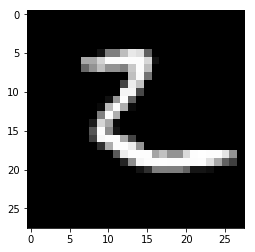

In [766]:
# Make predictions on test set
i = np.random.randint(len(x_test))
print("Prediction:", model.predict_classes(x_test[i:i+1]).tolist()[0])
print("Truth:", y_test[i:i+1].argmax())
ax = plt.imshow(x_test[i].reshape((28, 28)), cmap='gray')

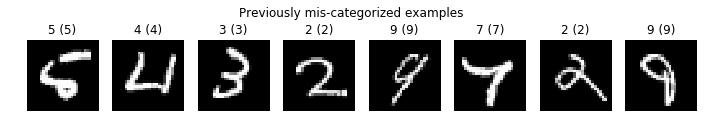

In [768]:
# Compare predictions to previous model
fig, axes = plt.subplots(1, 8, figsize=(12,2))

for i, ax in zip(error_indices[0:8], axes):
    ax.imshow(x_test[i].reshape((28, 28)), cmap='gray')
    y_hat = model.predict_classes(x_test[i:i+1]).tolist()[0]
    text = "{} ({})".format(y_hat, y_test[i:i+1].argmax())
    ax.set_title(text)
    ax.axis('off') 

fig.suptitle("Previously mis-categorized examples")
plt.show()

In [769]:
input("Press enter to continue")

Press enter to continue


''

In [ ]:
del x_train, y_train, x_test, y_test